<a href="https://colab.research.google.com/github/pp2098/Wine-Quality-Prediction/blob/main/CapstoneProject_ML_Multi_PoojaPandey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

In [ ]:
#Predicting the Quality of Wine on the between the scale of 0 to 3 grouping some features in same category
#Approach is done for checking model performance
#Till now also it is a multiclassification problem
#Building algorithms i.e., Logistic Regression,DT,RF,KNN,SVM

**Importing Library & Dataset**

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing Data
wine_df=pd.read_csv('QualityPrediction.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**EDA/Preprocessing**

In [ ]:
#counting the wine quality on the basis of scale
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#Checking the shape of dataset
wine_df.shape
#conclusion :there are 1599 rows and 12 columns

(1599, 12)

In [ ]:
#Checking the missing value
wine_df.info()
#No missing value detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#statistical analysis of dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Data Analysis & Visualization**

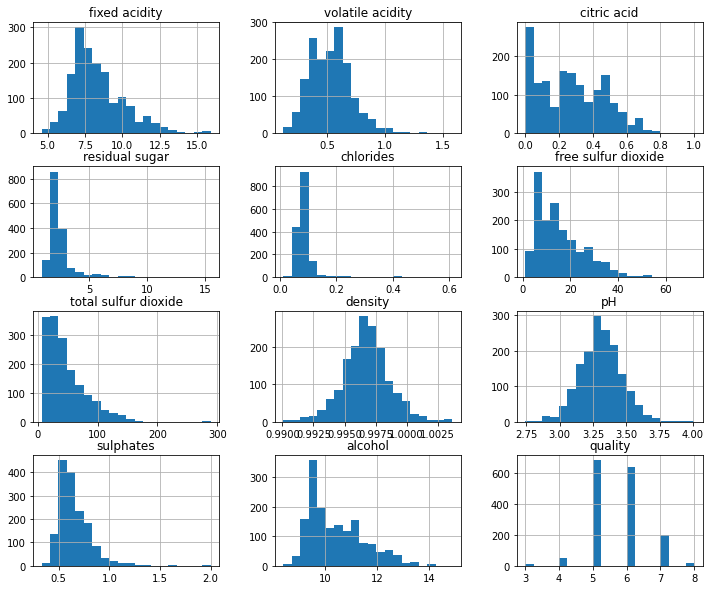

In [ ]:
#Visualization by histogram for spreadness of dataset
wine_df.hist(bins=20,figsize=(12,10))
plt.show()
#conclusion:Normally and skewed datset is this

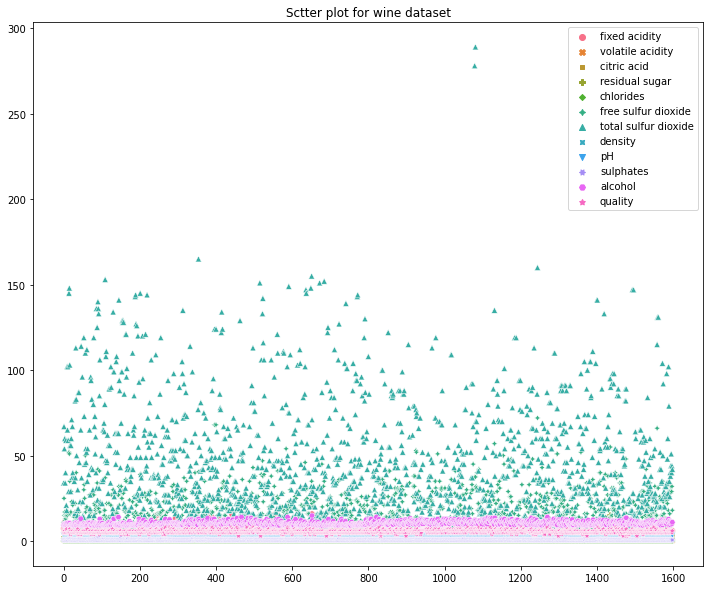

In [ ]:
#Visualization by Scatterplot
plt.figure(figsize=(12,10))
sns.scatterplot(data=wine_df)
plt.title("Sctter plot for wine dataset")
plt.show()

<Figure size 864x720 with 0 Axes>

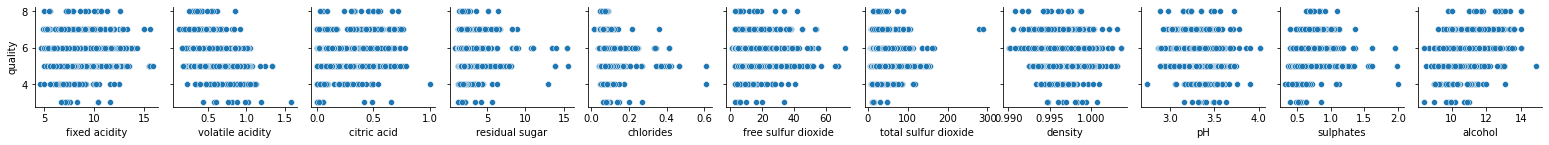

In [ ]:
#Scatterplot of independent features with respect to target variable i.e., quality
plt.figure(figsize=(12,10))
sns.pairplot(data=wine_df,x_vars=wine_df.drop('quality',axis=1),y_vars='quality',size=2,kind='scatter',height=10.0)
plt.show()

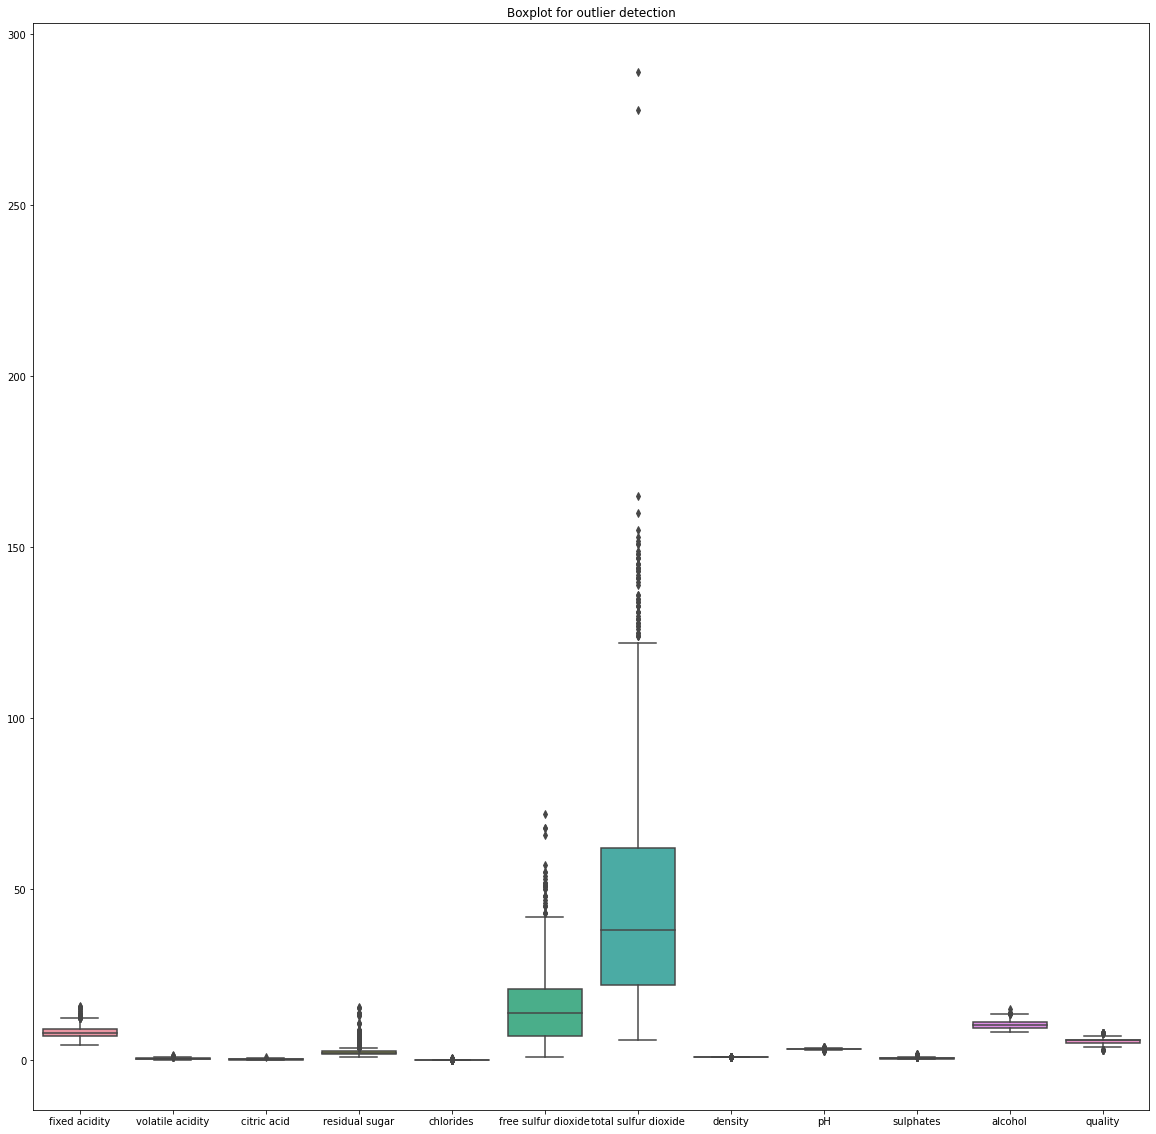

In [ ]:
#Boxplot for outlier detection
plt.figure(figsize=(20,20))
sns.boxplot(data=wine_df)
plt.title("Boxplot for outlier detection")
plt.show()
#Conclusion:since it is prediction problem we need not to be treat with outlier value

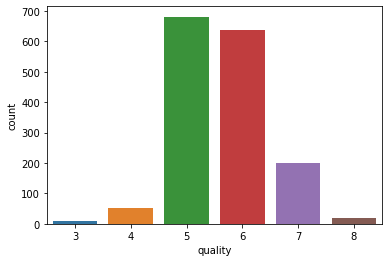

In [ ]:
#Quality spreadness check
sns.countplot(data=wine_df,x='quality')
plt.show()


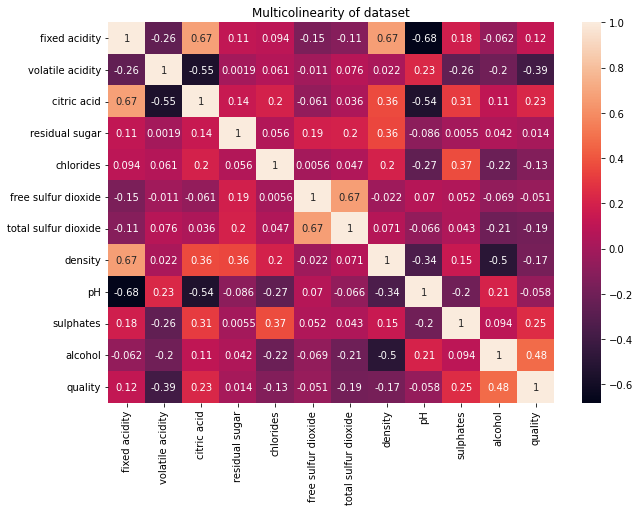

In [ ]:
#Heatmap for checking of multicolinearity
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(),annot=True)
plt.title("Multicolinearity of dataset")
plt.show()
#conclusion:since it is a predictive problem so we need not to be worry about multicollinearity


In [ ]:
#correleation of features with target varibale
wine_df.corr()['quality'].sort_values()
#conclusion:alcohol having large positive correleation with quality variable
#volatile acidity having the least one

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [ ]:
#analysing the scale of quality
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#since after annalyzing the dataset i found that if i create 4 classes which having very similar sort of value and then detetrmining the quality
#it is multiclassification problem here also but only the way of initializing is different for checking the performace of different models
def quality(x):
  if x<4:
    return 0
  elif x==4:
    return 1
  elif x==5 or x==6:
    return 2
  else:
    return 3
wine_df['quality']=wine_df['quality'].apply(quality)
wine_df['quality'].value_counts()


2    1319
3     217
1      53
0      10
Name: quality, dtype: int64

In [ ]:
#categorizing the data
X=wine_df.drop('quality',axis=1)
y=wine_df['quality']

**Splitting aand Feature engineering**

In [ ]:
#Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
#feature scaling
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
x_test=ss.transform(X_test)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("Y_train shape",y_train.shape)
print("Y_test shape",y_test.shape)

X_train shape (1119, 11)
X_test shape (480, 11)
Y_train shape (1119,)
Y_test shape (480,)


**Modle Building**

**1.Logistic Regression**

In [ ]:
#Initialization of model
lg=LogisticRegression(random_state=54)
#fitting the model
lg.fit(X_train,y_train)
lgpred=lg.predict(X_test)
acc_sr=metrics.accuracy_score(lgpred,y_test)
print("Accuracy score for Logistic Regression Model:")
print(acc_sr)

Accuracy score for Logistic Regression Model:
0.7395833333333334


Confusion matrix for Logistic regression model
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   9 321  33]
 [  1   8  74  34]]


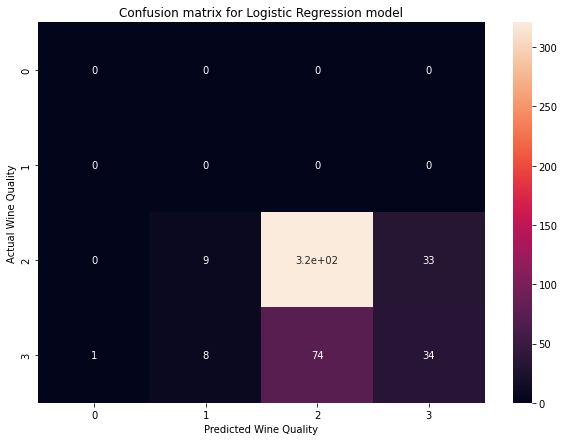

In [ ]:
print("Confusion matrix for Logistic regression model")
print(metrics.confusion_matrix(lgpred,y_test))
plt.figure(figsize=(10,7))
conf_mat=metrics.confusion_matrix(lgpred,y_test)
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion matrix for Logistic Regression model")
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Actual Wine Quality")
plt.show()

In [ ]:
print("Classifcation report for logistic regression model")
print(metrics.classification_report(y_test,lgpred))
#conclusion:f1 score is gretaer for class 2
#accuracy of model is 74%

Classifcation report for logistic regression model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.88      0.81      0.85       395
           3       0.29      0.51      0.37        67

    accuracy                           0.74       480
   macro avg       0.29      0.33      0.30       480
weighted avg       0.77      0.74      0.75       480



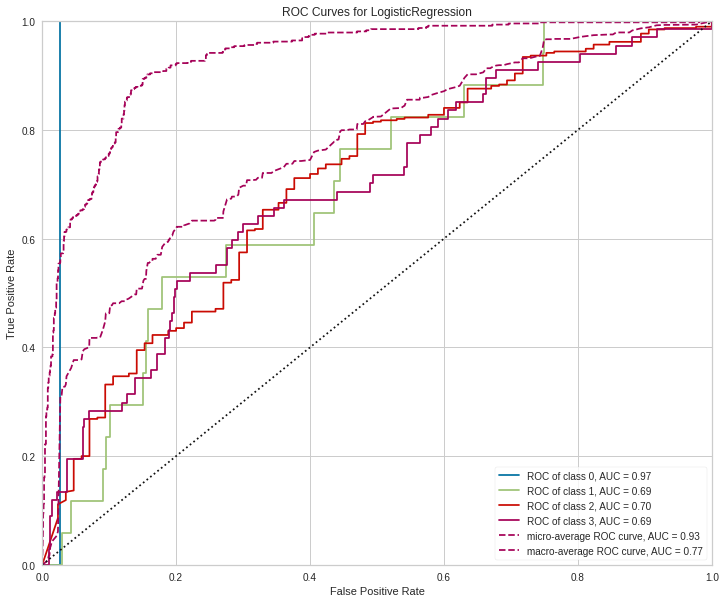

In [ ]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize=(12,10))
visualizer=ROCAUC(lg,classes=[0,1,2,3])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()
#model is seems to be moderately fit 
#average metric value is also high

In [ ]:
print("Cross val score for logistic regression")
score=cross_val_score(lg,X_train,y_train,cv=5)
score.mean()

Cross val score for logistic regression


0.8427210121716848

**2.Random Forest Method**

In [ ]:
#initiazing the model
rforest=RandomForestClassifier(random_state=5)
rforest.fit(X_train,y_train)
y_pred=rforest.predict(X_test)
print("Accurcay score for the RF model")
print(metrics.accuracy_score(y_test,y_pred))

Accurcay score for the RF model
0.8229166666666666


Confusion matrix for the RF model is
[[  0   0   1   0]
 [  0   0  17   0]
 [  0   0 395   0]
 [  0   0  67   0]]


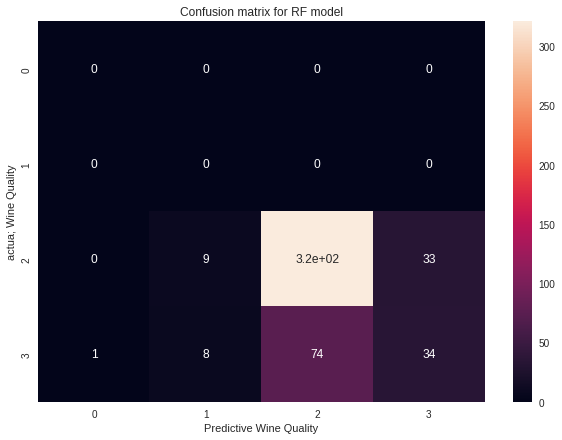

In [ ]:
print("Confusion matrix for the RF model is")
print(metrics.confusion_matrix(y_test,y_pred))
con_mat=metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion matrix for RF model")
plt.xlabel("Predictive Wine Quality")
plt.ylabel("actua; Wine Quality")
plt.show()

In [ ]:
print("classification report for Rf model")
print(metrics.classification_report(y_test,y_pred))
#accuracy is good
#here also Class 2 got high value of f1 score

classification report for Rf model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.82      1.00      0.90       395
           3       0.00      0.00      0.00        67

    accuracy                           0.82       480
   macro avg       0.21      0.25      0.23       480
weighted avg       0.68      0.82      0.74       480



In [ ]:
from yellowbrick.classifier import ROCAUC

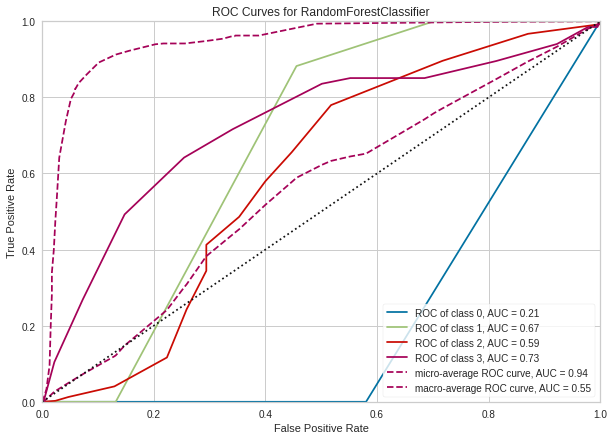

In [ ]:
plt.figure(figsize=(10,7))
visualizer1=ROCAUC(rforest,classes=[0,1,2,3])
visualizer1.fit(X_train,y_test)
visualizer1.score(X_test,y_test)
visualizer1.show()
#model is seems to be good fit apart for class 0 i.e., quality less than 4
#average metric score os good

In [ ]:
print("Cross Val Score for RF model")
score1=cross_val_score(rforest,X_train,y_train,cv=5)
score1.mean()

Cross Val Score for RF model


0.8722173286354901

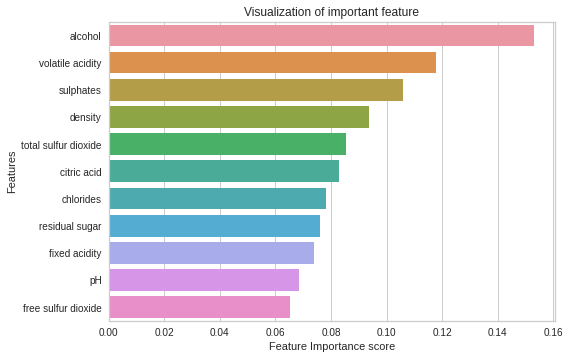

In [ ]:
#Plotting the feature according to RF model
feature_importance=pd.Series(rforest.feature_importances_,wine_df.columns[:11]).sort_values(ascending=False)
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.title("Visualization of important feature")
plt.xlabel("Feature Importance score")
plt.ylabel("Features")
plt.show()
#ALcohol is the most important for quality detection 
#free sulphur is least one

**Hyperparameter tuning by GridSearchCV**

In [ ]:
param_dist={'max_depth':[4,7,8,9],
            'max_features':['auto','sqrt','log2',None],
            'bootstrap':[True,False],
            'criterion':['gini','entropy']}
cv_rf=GridSearchCV(rforest,cv=10,param_grid=param_dist,n_jobs=-1)
cv_rf.fit(X_train,y_train)
print(cv_rf.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}


In [ ]:
rforest.set_params(max_depth=7,
                   max_features='auto',
                   criterion='gini',
                   bootstrap=True)

RandomForestClassifier(max_depth=7, random_state=5)

In [ ]:
rforest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=7, random_state=5)>

In [ ]:
rforest.fit(X_train,y_train)
rfor_pred_grid=rforest.predict(X_test)
print("accurcay of RF moodel after tuning")
print(metrics.accuracy_score(y_test,rfor_pred_grid))
#Both accuracy of before and after tuning is coming same

accurcay of RF moodel after tuning
0.8229166666666666


In [ ]:
print("Confusion matrix for Rf model after tuning")
print(metrics.confusion_matrix(y_test,rfor_pred_grid))

Confusion matrix for Rf model after tuning
[[  0   0   1   0]
 [  0   0  17   0]
 [  0   0 395   0]
 [  0   0  67   0]]


In [ ]:
print("Classification report of RF model after tuning")
print(metrics.classification_report(y_test,rfor_pred_grid))
print("Cross Val score for RF model after tuning: ",cross_val_score(rforest,X_train,y_train,cv=10).mean())

Classification report of RF model after tuning
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.82      1.00      0.90       395
           3       0.00      0.00      0.00        67

    accuracy                           0.82       480
   macro avg       0.21      0.25      0.23       480
weighted avg       0.68      0.82      0.74       480

Cross Val score for RF model after tuning:  0.8686695624195624


**3.Decision Tree**

In [ ]:
#Initiating the model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=58,max_depth=4)
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print("Accuracy score for DT model")
print(metrics.accuracy_score(y_test,dt_pred))


Accuracy score for DT model
0.8229166666666666


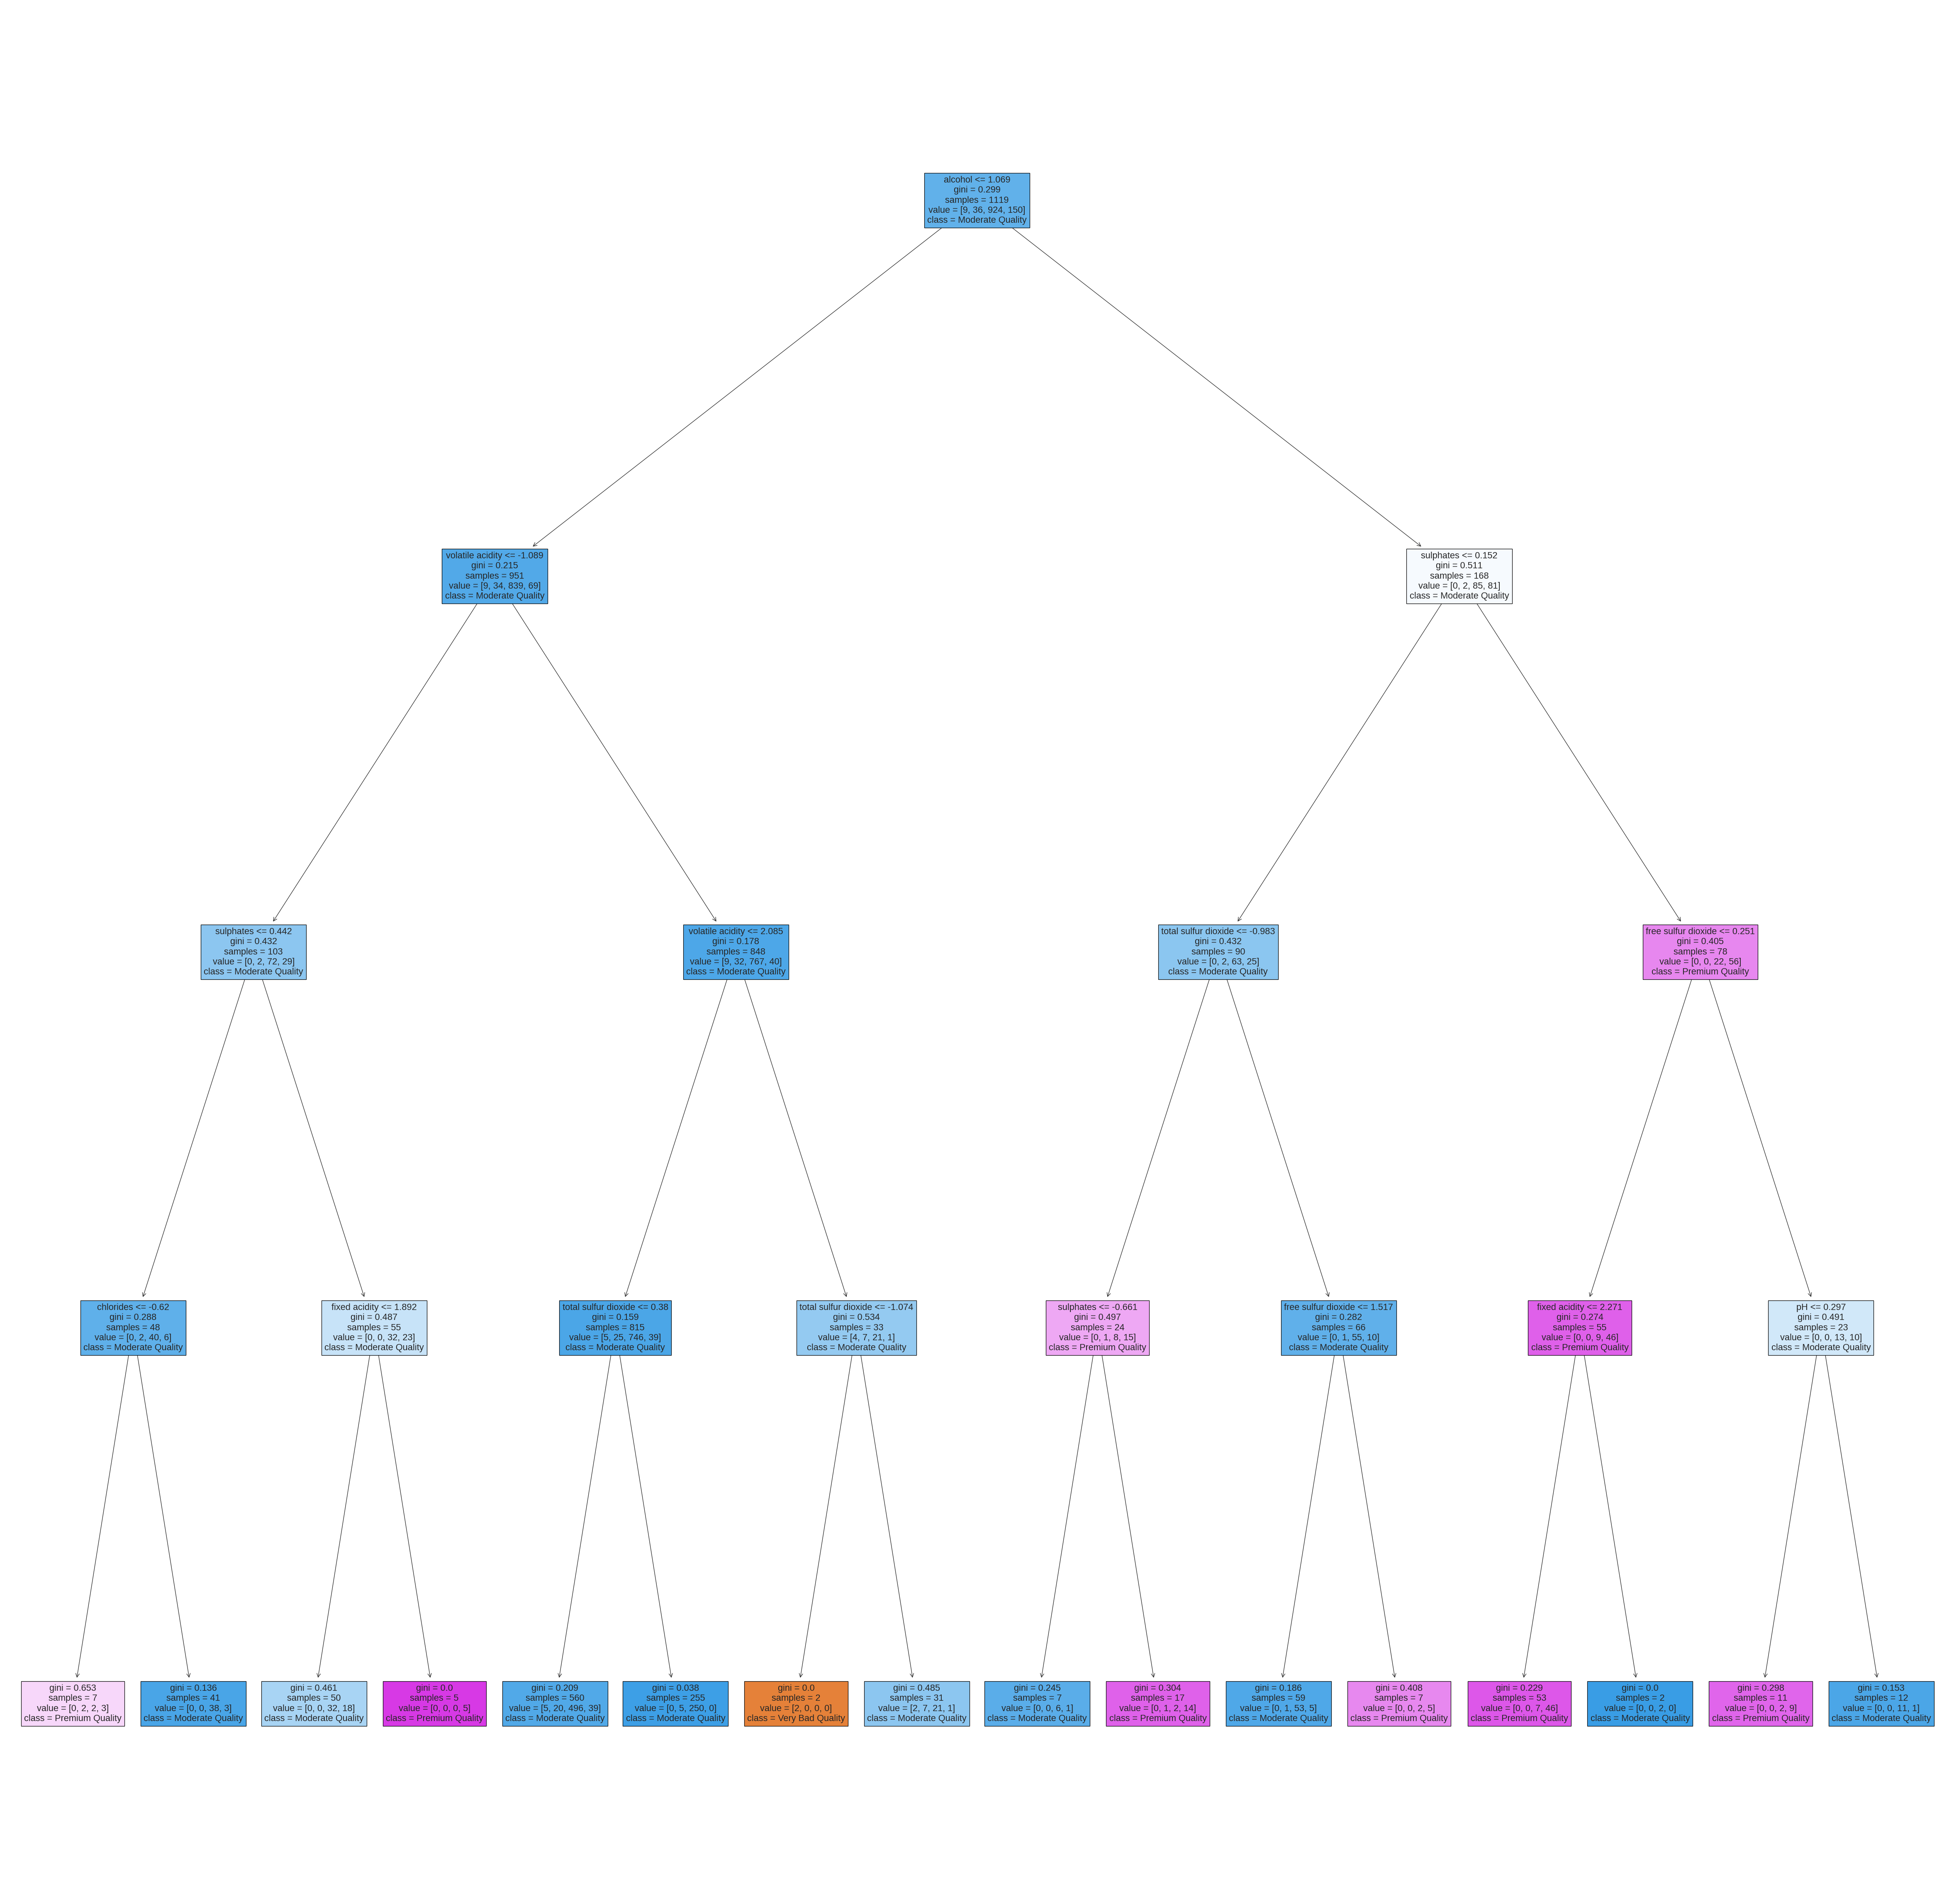

In [ ]:
#Plotting the DT
from sklearn import tree
a=pd.DataFrame(wine_df.drop(['quality'],axis=1))
column_name=list(a)
fn=column_name
cn=['Very Bad Quality','Bad Quality','Moderate Quality','Premium Quality']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,20),dpi=300)
tree.plot_tree(dt,
               feature_names=fn,
               class_names=cn,
               filled=True);
fig.savefig('DecisionTreeMulti.png')
                    


Confusion  matrix for DT model
[[  0   0   1   0]
 [  0   0  17   0]
 [  0   0 395   0]
 [  0   0  67   0]]


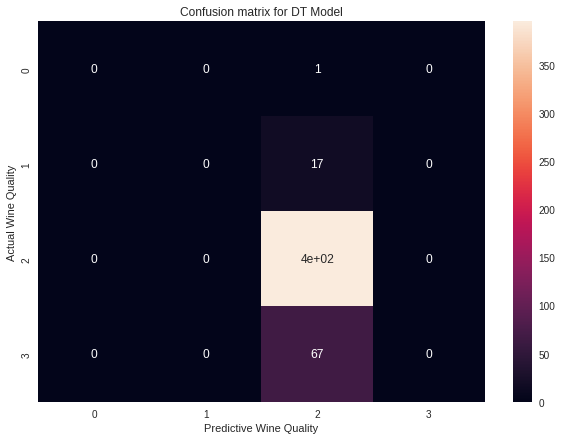

In [ ]:
print("Confusion  matrix for DT model")
print(metrics.confusion_matrix(y_test,dt_pred))
co_ma=metrics.confusion_matrix(y_test,dt_pred)
plt.figure(figsize=(10,7))
sns.heatmap(co_ma,annot=True)
plt.title("Confusion matrix for DT Model")
plt.xlabel("Predictive Wine Quality")
plt.ylabel("Actual Wine Quality")
plt.show()

In [ ]:
print("Classification report for DT Model")
print(metrics.classification_report(y_test,dt_pred))

Classification report for DT Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.82      1.00      0.90       395
           3       0.00      0.00      0.00        67

    accuracy                           0.82       480
   macro avg       0.21      0.25      0.23       480
weighted avg       0.68      0.82      0.74       480



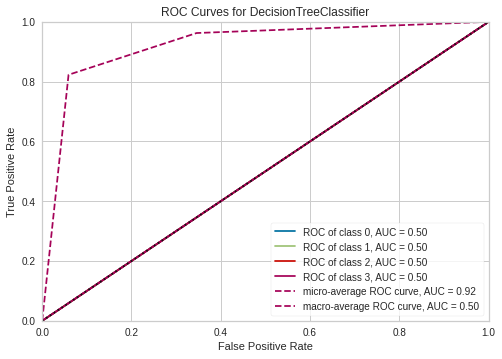

In [ ]:
visualizer2=ROCAUC(dt,classes=[0,1,2,3])
visualizer2.fit(X_train,y_train)
visualizer2.score(X_test,y_test)
visualizer2.show()
#It is a good fit model and metric averaage is also good


In [ ]:
print("Cross Val Score for DT model")
score2=cross_val_score(dt,X_train,y_train,cv=5)
score2.mean()

Cross Val Score for DT model


0.8480741511851377

**4.KNN Model**

In [ ]:
#Initiating the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
pred_knn_prob=knn.predict_proba(X_test)[::,1]
print("Accuracy score for KNN model")#checked for each k value and found this value consistent which will reduce error
print(metrics.accuracy_score(y_test,pred_knn))

Accuracy score for KNN model
0.8166666666666667


In [ ]:
print("Classification report for KNN Model")
print(metrics.classification_report(y_test,pred_knn))
print("Cross_val_score for KNN Model",cross_val_score(knn,X_train,y_train,cv=5).mean())

Classification report for KNN Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.82      0.99      0.90       395
           3       0.00      0.00      0.00        67

    accuracy                           0.82       480
   macro avg       0.21      0.25      0.23       480
weighted avg       0.68      0.82      0.74       480

Cross_val_score for KNN Model 0.836459000640615


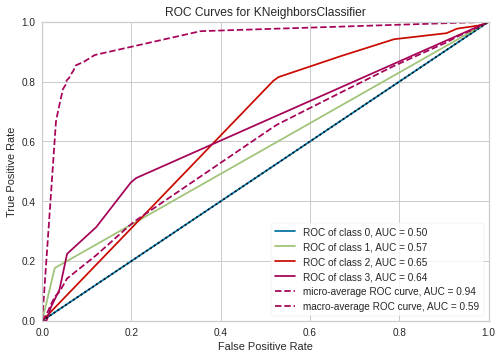

In [ ]:
visualizer4=ROCAUC(knn,classes=[0,1,2,3])
visualizer4.fit(X_train,y_train)
visualizer4.score(X_test,y_test)
visualizer4.show()
#this is moderately fit model
#good average mteric score
#many classes having auc score greater 0.5

Confusion matrix for KNN model
[[  0   0   1   0]
 [  0   0  16   1]
 [  0   0 392   3]
 [  0   0  67   0]]


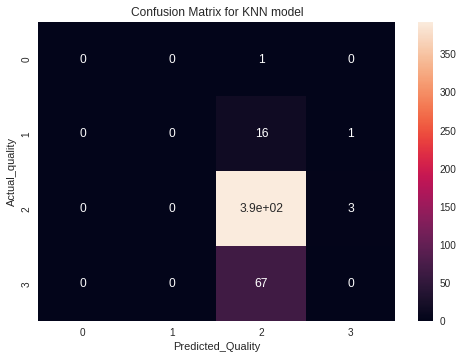

In [ ]:
con_knn=metrics.confusion_matrix(y_test,pred_knn)
print("Confusion matrix for KNN model")
print(con_knn)
sns.heatmap(con_knn,annot=True)
plt.title("Confusion Matrix for KNN model")
plt.xlabel("Predicted_Quality")
plt.ylabel("Actual_quality")
plt.show()

**5.Support Vector Machine**

In [ ]:
#Initializing the model
from sklearn.svm import SVC
svc=SVC(random_state=51)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
print(metrics.accuracy_score(y_test,svc_pred))

0.8229166666666666


Tuning with best fit parameter using GridSearchCV

In [ ]:
svc=SVC(C=1,kernel='rbf',gamma=0.1,random_state=51)#C value higher ehile gamma value lower
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
print(metrics.accuracy_score(y_test,pred_svc))
#both having same score

0.8229166666666666


In [ ]:
print("Classiication report for SVM model")
print(metrics.classification_report(y_test,pred_svc))
print("Cross val score for SVM model")
print(cross_val_score(svc,X_train,y_train,cv=10).mean())

Classiication report for SVM model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.82      1.00      0.90       395
           3       0.00      0.00      0.00        67

    accuracy                           0.82       480
   macro avg       0.21      0.25      0.23       480
weighted avg       0.68      0.82      0.74       480

Cross val score for SVM model
0.8480936293436294


confusion matrix for SVM model
[[  0   0   1   0]
 [  0   0  17   0]
 [  0   0 395   0]
 [  0   0  67   0]]


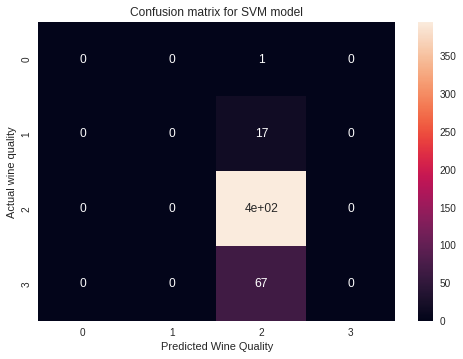

In [ ]:
conf_svm=metrics.confusion_matrix(y_test,pred_svc)
print("confusion matrix for SVM model")
print(conf_svm)
sns.heatmap(conf_svm,annot=True)
plt.title("Confusion matrix for SVM model")
plt.xlabel("Predicted Wine Quality")
plt.ylabel("Actual wine quality")
plt.show()

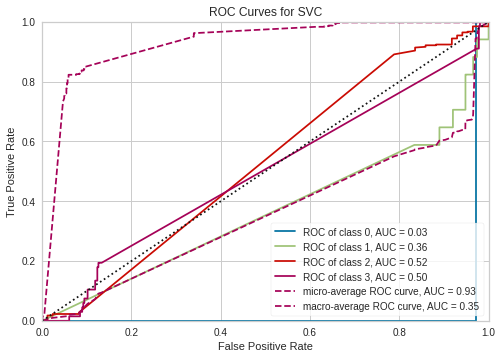

In [ ]:
visualizer5=ROCAUC(svc,classes=[0,1,2,3])
visualizer5.fit(X_train,y_train)
visualizer5.score(X_test,y_test)
visualizer5.show()
#Not a good fit
#Do not classify each perfectly many classes having score less than 0.5

**Summarizing the accuracy & Cross val score**

In [ ]:
df=pd.DataFrame({"Model_Name":['Logistic Regression','Decision Tree','Random Forest','KNN','SVM'],
                 "Accuracy(in %)":[74,82,82,82,82],
                 "Cross_Val_Score":[84.2,84.8,86.86,83.6,84.80]}
                )
df

,Model_Name,Accuracy(in %),Cross_Val_Score
0,Logistic Regression,74,84.20
1,Decision Tree,82,84.80
2,Random Forest,82,86.86
3,KNN,82,83.60
4,SVM,82,84.80


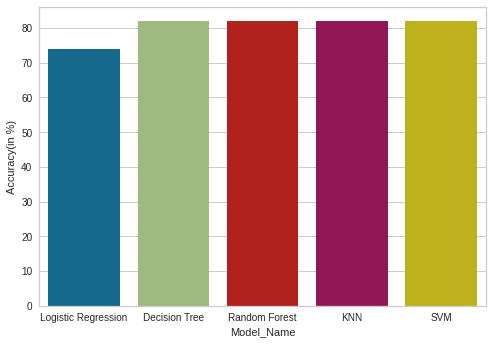

In [ ]:
#barplot between model Vs Accuracy
sns.barplot(data=df,x='Model_Name',y='Accuracy(in %)')
plt.show()

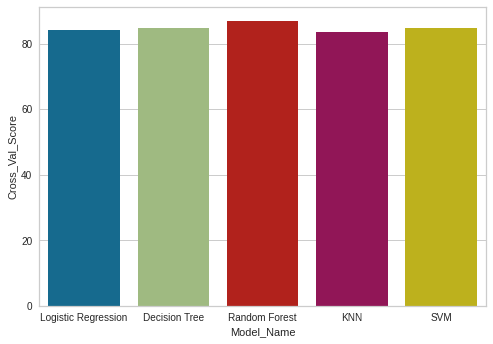

In [ ]:
#Bar plot between models Vs Cross Val score
sns.barplot(x='Model_Name',y='Cross_Val_Score',data=df)
plt.show()

**Prediction**

In [ ]:
input_data=(7.7,0.7,1.0,1.9,0.076,11.0,34.0,0.1,3.51,0.56,9.4)
input_data_as_numpy=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
prediction=rforest.predict(input_data_reshaped)
print(prediction)
if prediction==0:
  print("Very Bad Quality Wine")
elif prediction==1:
  print("Bad Quality Wine")
elif prediction==2:
  print("Moderate Quality Wine")
else:
  print("Premium Quality Wine")

[2]
Moderate Quality Wine


**Conclusion**

1.It is a type of Multiclassification problem but in this i did a small change that i analyze there is quite same value of parameters between two so i put them in a same class.

2.By reducing the number of classes i analyzed that accuracy score and cross val score increases much better way.

3.I would like to go with RF model beacuse of having good accuracy plus good cross val score after that i will go with DT model.

4.I made a prediction test also with RF model and it is throwing me a correct results.

5.No outlier and miscollinearity treatment is done because it is a prediction problem so no need of it.

6.NB is not applied because it is robust to multicollinearity.

7.Feature engineering is required for distance based model

**Final Concluding remarks**

1.Binary Classification throws the best output in terms of good or bad quality wine with good numbers of accuracy and cross val score.There is good weighted average value is also observed and good roc curves are also obtained.

2.Multiclassification with all categories just throwing not a good accuracy number as well as cross val score.Their ROC curves are not very well to classify between the more number of classes

3.slightly modification of approach depicts the drastic change in numbers,starts throwing good accuracy number and good cross val score also.Here ROC curves are also Telling the moderate fitting of data.

4.In all the models RF model is selected as a preference for predicting the quality of wine in both binary and both multiclassification problem.At last in all problems one preidction is made by best selected model i.e., RF model.